Задание к уроку 8. Обучение без учителя в scikit-learn

## Задание 1

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_boston
boston = load_boston()

In [6]:
data = boston.data

In [7]:
feature_names = boston.feature_names

In [8]:
X = pd.DataFrame(data, columns=feature_names)

In [9]:
target = boston.target

In [10]:
Y = pd.DataFrame(target, columns=['price'])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [16]:
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [17]:
from sklearn.manifold import TSNE

In [20]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

print('До:\t{}'.format(X_train_scaled.shape))
print('После:\t{}'.format(X_train_tsne.shape))

До:	(404, 13)
После:	(404, 2)


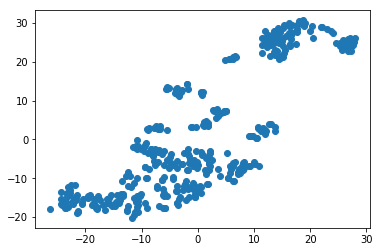

In [21]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

## Задание 2

In [23]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, max_iter=100, random_state=42)

In [24]:
train_labels = model.fit_predict(X_train_scaled)

In [33]:
centers = scaler.inverse_transform(model.cluster_centers_)

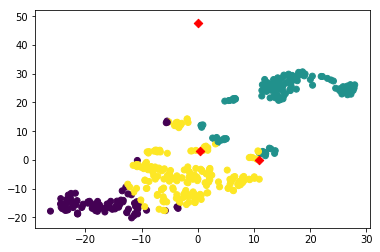

In [34]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=train_labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='D', color='red')

Видно, что центры кластеров как-то некорректно были взяты. Не могу понять в чем проблема. Центров 13, а модель TSNE снижает размерность с 13 до 2. Как найти именно те три центра? Просьба пояснить (можно на вебинаре).

In [44]:
print('Кластер 0: {}'.format(X_train.loc[train_labels == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(X_train.loc[train_labels == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(X_train.loc[train_labels == 2, 'CRIM'].mean()))

Кластер 0: 0.07356558139534884
Кластер 1: 10.797028425196851
Кластер 2: 0.4216602094240837


In [50]:
print('Кластер 0: {}'.format(Y_train.loc[train_labels == 0, 'price'].mean()))
print('Кластер 1: {}'.format(Y_train.loc[train_labels == 1, 'price'].mean()))
print('Кластер 2: {}'.format(Y_train.loc[train_labels == 2, 'price'].mean()))

Кластер 0: 27.78837209302326
Кластер 1: 16.165354330708663
Кластер 2: 24.958115183246072


Три кластера характеризуются разной криминогенной обстановкой, разными ценами на недвижимость. Однако, первый и последний кластеры имеют практически одинаковую среднюю цену, но различаются криминогенной обстановкой.